<a href="https://colab.research.google.com/github/e18679/ML0930/blob/master/fashionmlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
trans = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,16,0,1,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,160,78,0,0,0,5,3,2,2,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,3,188,165,137,47,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,2,2,0,91,159,141,162,165,102,57,12,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,172,176,208,180,190,213,206,204,192,209,172,101,141,20,0
9,0,0,0,0,0,0,0,0,0,2,0,0,131,185,162,163,153,187,199,199,199,203,205,209,212,185,0,0


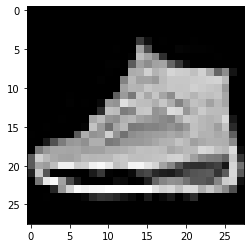

In [4]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
layers=[
        # 784 * 128 + 128
        Dense(256 ,activation="relu", input_dim=784),
        Dropout(0.25),
        # 128 * 10 +  10(bias)
        Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
# x_train_norm[0]

In [7]:
# 一個神經元: binary crossentropy p log 1/q + (1-p) log 1/(1-q)
# 多個神經元: categorical crossentropy p1 log 1/q1 +.....
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [8]:
# batch: 100`200(小圖片) 10`20(大圖片)
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
540/540 - 3s - loss: 0.5553 - accuracy: 0.8048 - val_loss: 0.4305 - val_accuracy: 0.8440
Epoch 2/50
540/540 - 2s - loss: 0.4046 - accuracy: 0.8545 - val_loss: 0.3739 - val_accuracy: 0.8678
Epoch 3/50
540/540 - 2s - loss: 0.3678 - accuracy: 0.8666 - val_loss: 0.3649 - val_accuracy: 0.8693
Epoch 4/50
540/540 - 2s - loss: 0.3439 - accuracy: 0.8741 - val_loss: 0.3372 - val_accuracy: 0.8818
Epoch 5/50
540/540 - 2s - loss: 0.3253 - accuracy: 0.8809 - val_loss: 0.3334 - val_accuracy: 0.8790
Epoch 6/50
540/540 - 2s - loss: 0.3142 - accuracy: 0.8845 - val_loss: 0.3243 - val_accuracy: 0.8847
Epoch 7/50
540/540 - 2s - loss: 0.2995 - accuracy: 0.8898 - val_loss: 0.3257 - val_accuracy: 0.8805
Epoch 8/50
540/540 - 2s - loss: 0.2925 - accuracy: 0.8926 - val_loss: 0.3139 - val_accuracy: 0.8843
Epoch 9/50
540/540 - 2s - loss: 0.2834 - accuracy: 0.8955 - val_loss: 0.3067 - val_accuracy: 0.8885
Epoch 10/50
540/540 - 2s - loss: 0.2775 - accuracy: 0.8965 - val_loss: 0.3160 - val_accuracy: 0.8867

In [9]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8896


[0.3252812922000885, 0.8895999789237976]

In [10]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(原本)".format(n) for n in trans],
      columns=["{}(預測)".format(n) for n in trans])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt(原本),877,2,17,18,3,0,79,0,4,0
Trouser(原本),3,972,1,20,2,0,2,0,0,0
Pullover(原本),17,1,844,13,72,0,53,0,0,0
Dress(原本),19,5,8,912,26,0,26,0,4,0
Coat(原本),1,1,113,39,795,0,51,0,0,0
Sandal(原本),0,0,0,1,0,951,0,20,1,27
Shirt(原本),144,1,94,34,54,0,669,0,4,0
Sneaker(原本),0,0,0,0,0,14,0,934,0,52
Bag(原本),6,0,7,5,2,1,11,4,964,0
Ankle boot(原本),0,0,0,0,0,3,1,18,0,978


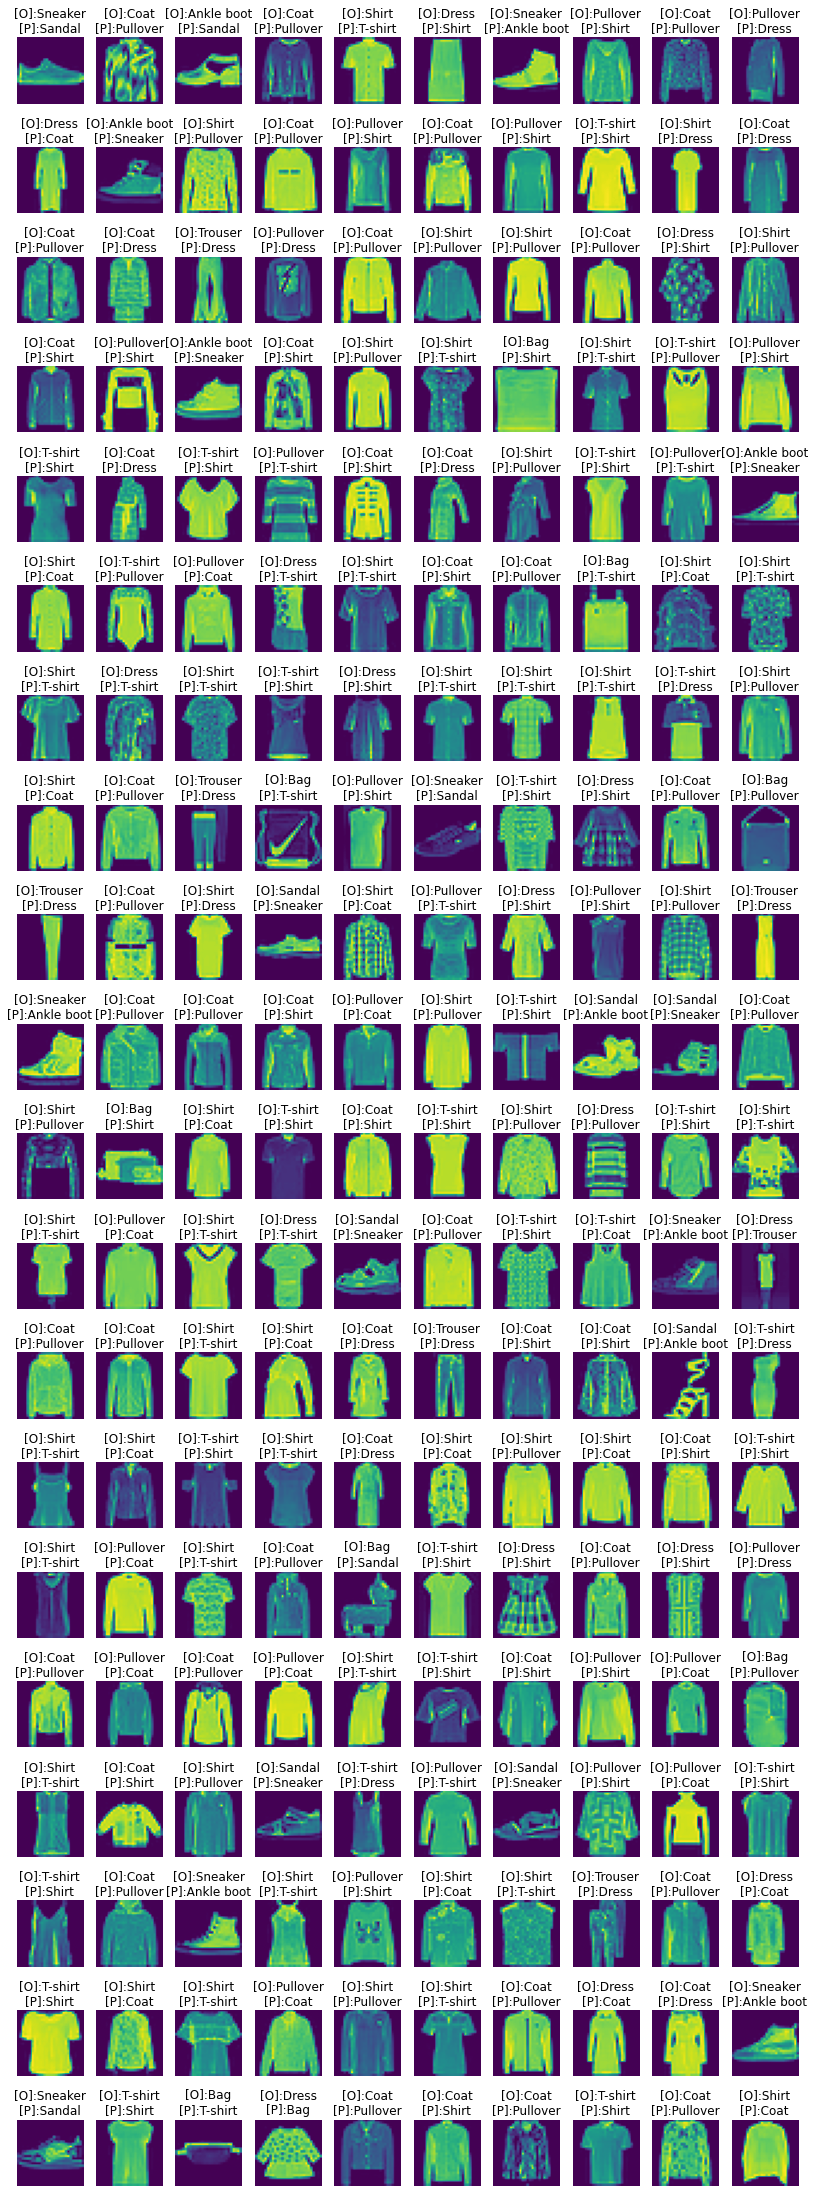

In [11]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

In [12]:
# pip install pillow
import PIL
fn = input("檔名")
img = PIL.Image.open(fn).convert("L").resize((28, 28))
img_np = np.array(img)
test = img_np.reshape(1, 784) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(trans[i], "的機率是:", round(p, 3))
plt.imshow(img_np)

KeyboardInterrupt: ignored